![Astrofisica Computacional](../logo.PNG)

---
## 30. Integración Numérica


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

En este cuaderno se presentan algunas técnicas de integración numérica.

---

Una de las tareas más comunes en astrofísica es evaluar integrales como

\begin{equation}
I = \int_a^b f(x) dx ,
\end{equation}

y, en muchos casos, estas no pueden realizarse en forma analítica. El integrando en estas expresiones puede darse como una función analítica $f(x)$ o como un conjunto discreto de valores $f(x_i)$. Acontinuación describiremos algunas técnicas para realizar estas integrales numéricamente en ambos casos.
 
--- 
## Interpolación por intervalos y cuadraturas

Cualquier método de integración que utilice una suma con pesos es denominado **regla de cuadraturas**. Suponga que conocemos (o podemos evaluar) el integrando  $f(x)$ en un conjunto finito de *nodos*, $\{x_j\}$ con $j=0,\cdots,n$ en el intervalo $[a,b]$ y tal que $x_0 = a$ y $x_n = b$. Con esto se obtendrá un conjunto de $n+1$ nodos o equivalentemente $n$ intervalos. Una aproximación discreta de la integral de esta función está dada por la **regla del rectángulo**,

\begin{equation}
I = \int_a^b f(x) dx \approx  \Delta x \sum_{i=0}^{n-1} f(x_i),
\end{equation}

donde el ancho de los intervalos es $\Delta x = \frac{b-a}{n}$. A partir de la definición de una integral, es claro que esta aproximación converge al valor real de la integral cuando $n\rightarrow \infty$, i.e. cuando $\Delta x \rightarrow 0$. 

A pesar de que la regla del rectangulo puede dar una buena aproximación de la integral, puede ser mejorada al utilizar una función interpolada en cada intervalo. Los métodos en los que se utiliza la interpolación de polinomios se denominan, en general, **cuadraturas de Newton-Cotes**.

---
### Regla de punto medio

La modificación más simple a la regla del rectángulo descrita arriba es utilizar el valor central de la función $f(x)$ en cada intervalo en lugar del valor en uno de los nodos. de Esta forma, si es posible evaluar el integrando en el punto medio de cada intervalo, el valor aproximado de la integral estará dado por

\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum _{i=0}^{n-1} (x_{i+1} - x_i)  f(\bar{x}_i ),
\end{equation}

donde $\bar{x}_i = \frac{x_i + x_{i+1}}{2}$ es el punto medio en el intervalo $[x_i, x_{i+1}]$.

Con el fin de estimar el error asociado con este método, se utiliza una expansión en serie de Taylor del integrando en el intervalo $[x_i, x_{i+1}]$ alrededor del punto medio $\bar{x}_i$,

\begin{equation}
f(x) = f(\bar{x}_i) + f'(\bar{x}_i)(x-\bar{x}_i) + \frac{f''(\bar{x}_i)}{2}(x-\bar{x}_i)^2 + \frac{f'''(\bar{x}_i)}{6}(x-\bar{x}_i)^3 + ...
\end{equation}

Integrando esta expresión desde $x_i$ hasta $x_{i+1}$, y notando que los terminos de orden impar se anulan, se obtiene

\begin{equation}
\int_{x_i}^{x_{i+1}} f(x)dx = f(\bar{x}_i)(x_{i+1}-x_i) + \frac{f''(\bar{x}_i)}{24}(x_{i+1}-x_i)^3 + ...
\end{equation}

Esta expansión muestra que el error asociado con la aproximación en cada intervalo es de orden $\varepsilon_i =  (x_{i+1}-x_i)^3$. Ya que la integral total se obtiene como una suma de $n$ integrales similares, el error total es será de orden $\varepsilon = n \varepsilon_i $. 

Cuando los nodos están igualmente espaciados, podemos escribir el tamaño de estos intervalos como  $h = \frac{b - a}{n}$ y por ello, el error asociado con cada intervalo es $\varepsilon_i =\frac{(b - a)^3}{n^3} = h^3$, mientras que el error total de la cuadratúra será de orden $\varepsilon = n \varepsilon_i = \frac{(b - a)^3}{n^2} = nh^3$.

#### Ejemplo. Integración numérica

Leeremos los datos de la función desde un archivo .txt y estimaremos numéricamente el valor de la integral de esta función utilizando la regla del punto medio. Debido a que la función esdada en forma de puntos discretos (y no en forma analítica), no es posible evaluar el valor de la función en los puntos medios por lo que utilizaremos inicialmente el valor en el primer punto de cada uno de los intervalos para calcular las sumas parciales. 

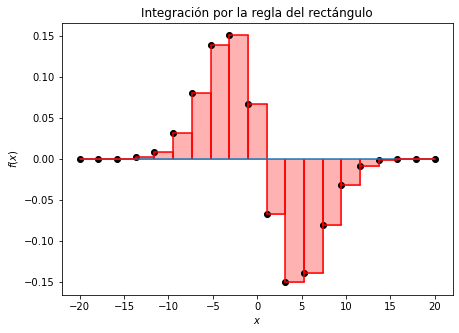

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = 5.01388e-06


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)


plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    Integral = Integral + h*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración por la regla del rectángulo')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')

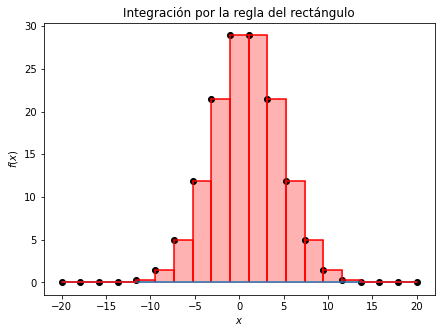

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = 2.91244e+02


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)


plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    Integral = Integral + h*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración por la regla del rectángulo')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')

---
### Regla del Trapezoide

La siguiente generalización de la regla del rectángulo corresponde a aproximar la función $f(x)$ con un polinomio lineal en cada uno de los intervalos. Esto se conoce como la **regla del trapezoide** y la correspondiente cuadratura estará dada por 

\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum _{i=0}^{n-1} \frac{1}{2} (x_{i+1} - x_i)  \left[ f(x_{i+1}) + f(x_i) \right] .
\end{equation}

Contrario a lo que sucede en la regla del punto medio, este método no necesita la evaluación del integrando en el punto medio sino en los dos nodos de cada intervalo.

#### Ejemplo. Integración con la regla del trapezoide.

De nuevo se leerán los datos de la función a partir de un archivo .txt file y se integrará numéricamente utilizando la regla del trapezoide. 

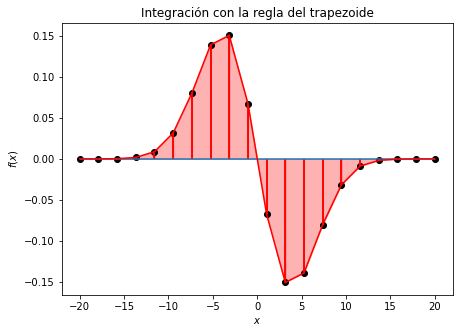

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = -7.87808e-17


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + h*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración con la regla del trapezoide')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')

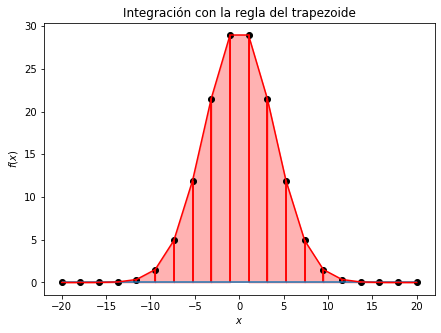

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = 2.91244e+02


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + h*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración con la regla del trapezoide')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')


---
## Regla de Simpson

La regla de Simpson es un método en el que la integral $f(x)$ se estima aproximando el integrando por un polinomi de segundo orden en cada intervalo.

Si se conocen tres valores de la función; $f_1 =f(x_1)$, $f_2 =f(x_2)$ y $f_3 =f(x_3)$; en los puntos $x_1 < x_2 < x_3$, se puede ajustar un polinomio de segundo orden de la forma 
l
\begin{equation}
p_2 (x) = A (x-x_1)^2 + B (x-x_1) + C .
\end{equation} 

Al integrar este polinomio en el intervalo  $[x_1 , x_3]$, se obtiene

\begin{equation}
\int_{x_1}^{x^3} p_2 (x) dx = \frac{x_3 - x_1}{6} \left( f_1 + 4f_2 + f_3 \right) + \mathcal{O} \left( (x_3 - x_1)^5 \right)
\end{equation}

---
### Regla de Simpson con nodos igualmente espaciados 

Si se tienen $N$ nodos igualmente espaciados en el intervalo de integración, o equivalentemente $n=N-1$ intervalos con un ancho constante  $h$, la integral total mediante la regla de Simpson se escribe en la forma

\begin{equation}
I = \int_a^b f(x) dx \approx \frac{h}{3} \sum_{i=0}^{\frac{n-2}{2}} \left[ f(x_{2i}) + 4f(x_{2i+1}) + f(x_{2i+2}) \right] .
\end{equation}

El error numérico en cada intervalo es de orden $h^5$ y por lo tanto, la integral total tendrá un error de orden $n h^5 = \frac{(a-b)^5}{n^4}$.

#### Ejemplo. Integración con la regla de Simpson

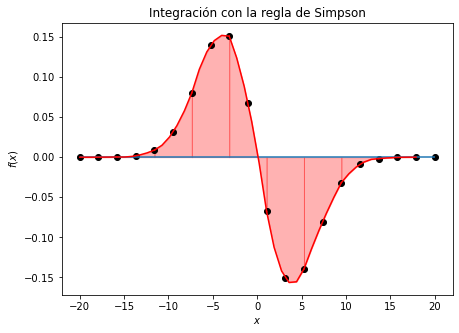

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = 2.24796e-05


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)
n = N-1

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h = x[2*i+1] -x[2*i] 
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración con la regla de Simpson')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')


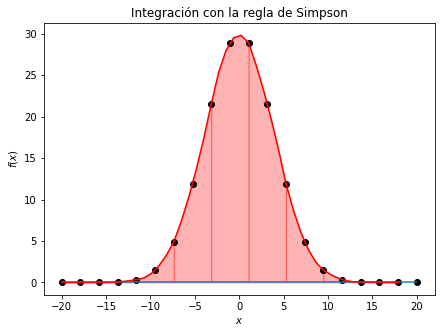

El resultado de la integración numérica de la función discreta
entre x = -20.0 y x = 20.0 es I = 2.91243e+02


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)
n = N-1

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h =  x[2*i+1] - x[2*i]
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Integración con la regla de Simpson')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'El resultado de la integración numérica de la función discreta')
print(f'entre x = {x[0]:.1f} y x = {x[len(x)-1]:.1f} es I = {Integral:.5e}')

---
### Regla de Simpson para nodos no-equidistantes

Cuando los nodos de la malla de discretización de $f(x)$ no están igualmente espaciados, la regla de Simpson debe modificarse en la forma

\begin{equation}
I = \int_a^b f(x) dx \approx \sum_{i=0}^{\frac{n-2}{2}} \left[ \alpha f(x_{2i}) + \beta f(x_{2i+1}) +\gamma f(x_{2i+2}) \right] 
\end{equation}

donde 

\begin{align}
\alpha = &\frac{-h_{2i+1}^2 + h_{2i+1} h_{2i} + 2 h_{2i}^2}{6 h_{2i}}   \\
\beta = &\frac{ (h_{2i+1} + h_{2i})^3 }{6 h_{2i+1} h_{2i}} \\
\gamma =&  \frac{2 h_{2i+1}^2 + h_{2i+1} h_{2i} - h_{2i}^2}{6 h_{2i+1}}
\end{align}

y $h_j = x_{j+1} - x_j$.